In [38]:
#loading all the library. 

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.cluster import KMeans
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import google.datalab.storage as storage
import pandas as pd
from io import BytesIO
import google.datalab.storage as storage

In [4]:
# Reading the data on google cloud storage.

!gsutil cp 'gs://sales_data_123/sales.csv' ./

AccessDeniedException: 403 92726491891-compute@developer.gserviceaccount.com does not have storage.objects.list access to sales_data_123.


In [47]:
#viewing the datasets as csv file

df = pd.read_csv('sales.csv') 
df.head(10)

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [48]:
#Making sure that all the data is cleaned and checking the null value too!

df.isnull().any().any()

False

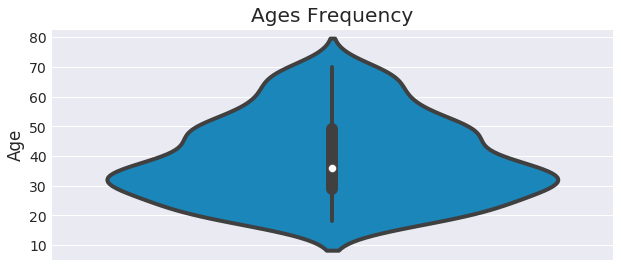

In [49]:
# Droped the first column data as its not required on the creating clystering model.

df.drop(["CustomerID"], axis = 1, inplace=True)
plt.figure(figsize=(9,4))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

# looking the age graph to understand what are the age group has provided the sale data

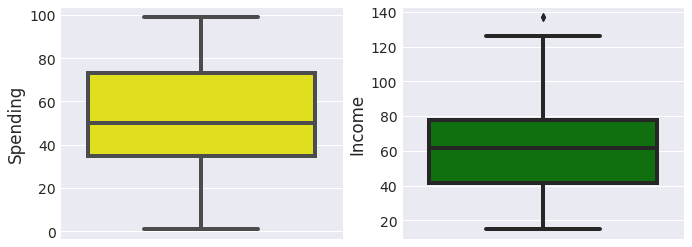

In [50]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending"], color="yellow")
plt.subplot(1,2,2)
sns.boxplot(y=df["Income"], color = "green")
plt.show()

#looking at the ratio of Spending and Incoming average value to understand the maximum and minmum fig.

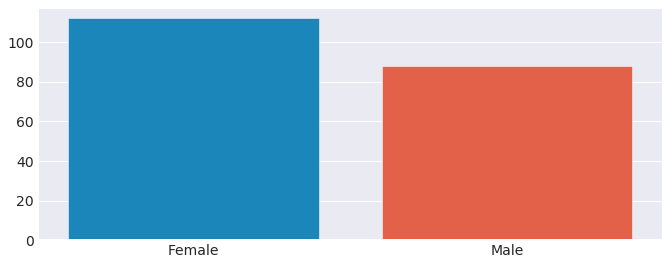

In [51]:
genders = df.Gender.value_counts()

df = df.replace({'Gender':{ "Male":0, "Female":1}})

#df.drop(["Gender"], axis = 1, inplace=True)
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

# finding the gender ratio for the sales target audience with specific marketing based on their expence and income


In [52]:
df.head(5)

,Gender,Age,Income,Spending
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


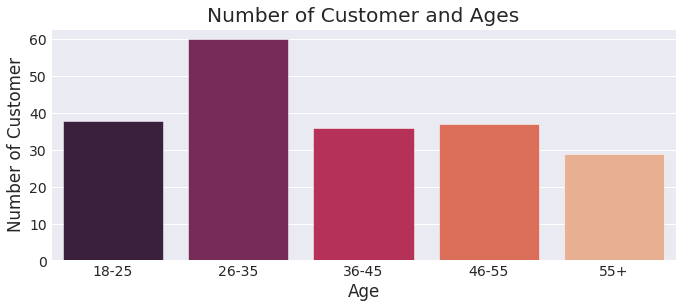

In [53]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(10,4))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

# this Char would help us to understand the number audience need to target for the marking campaign and other sale promotion activity 
# For eg. - here the youngest age group has very high number who does the regular shopping.


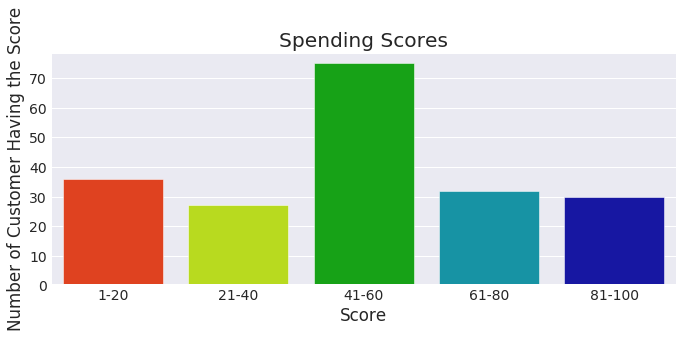

In [54]:
ss1_20 = df["Spending"][(df["Spending"] >= 1) & (df["Spending"] <= 20)]
ss21_40 = df["Spending"][(df["Spending"] >= 21) & (df["Spending"] <= 40)]
ss41_60 = df["Spending"][(df["Spending"] >= 41) & (df["Spending"] <= 60)]
ss61_80 = df["Spending"][(df["Spending"] >= 61) & (df["Spending"] <= 80)]
ss81_100 = df["Spending"][(df["Spending"] >= 81) & (df["Spending"] <= 100)]
ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,4))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

# This graph would help us to understand how much average spending , maximum and minumum does under 5 category of audience

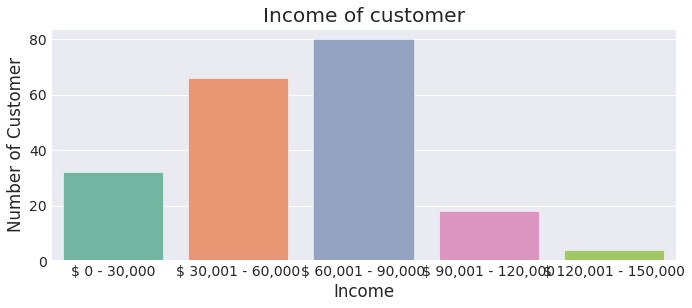

In [55]:
ai0_30 = df["Income"][(df["Income"] >= 0) & (df["Income"] <= 30)]
ai31_60 = df["Income"][(df["Income"] >= 31) & (df["Income"] <= 60)]
ai61_90 = df["Income"][(df["Income"] >= 61) & (df["Income"] <= 90)]
ai91_120 = df["Income"][(df["Income"] >= 91) & (df["Income"] <= 120)]
ai121_150 = df["Income"][(df["Income"] >= 121) & (df["Income"] <= 150)]
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]
plt.figure(figsize=(10,4))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Income of customer")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

# This graph is help us to understand the highest income ratio of the customer to target the product pricing or sale optimization 

In [56]:
df.head(3)

,Gender,Age,Income,Spending
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6


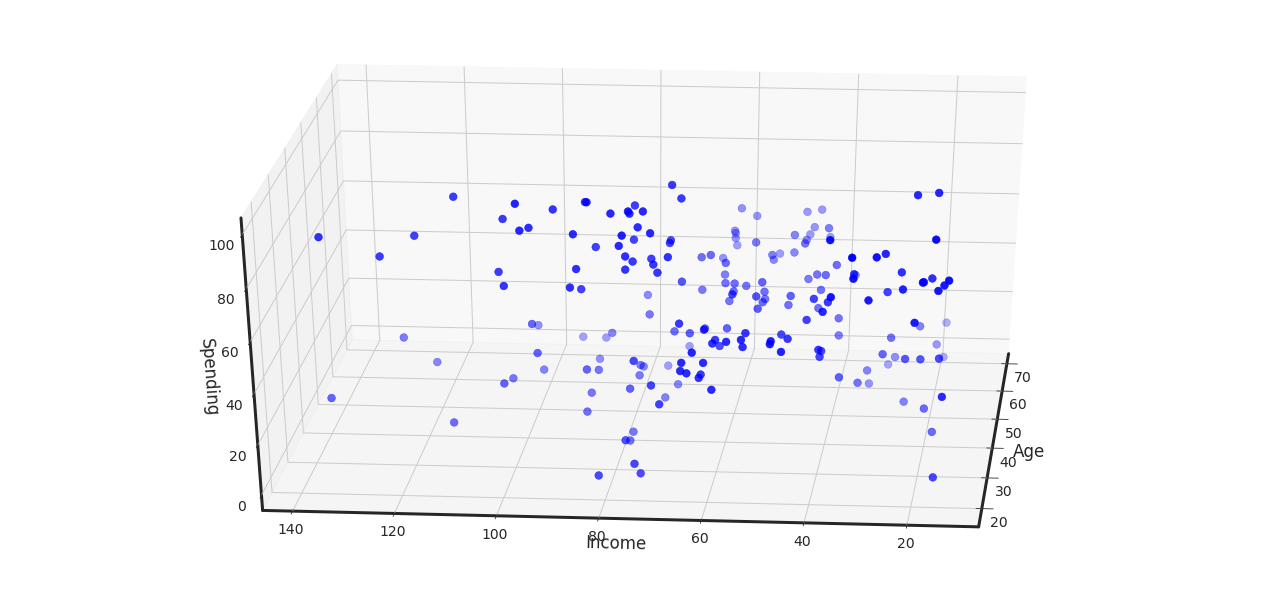

In [57]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Income"], df["Spending"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel('Spending')
plt.show()

# All set of data points on the spending, income and Age group.


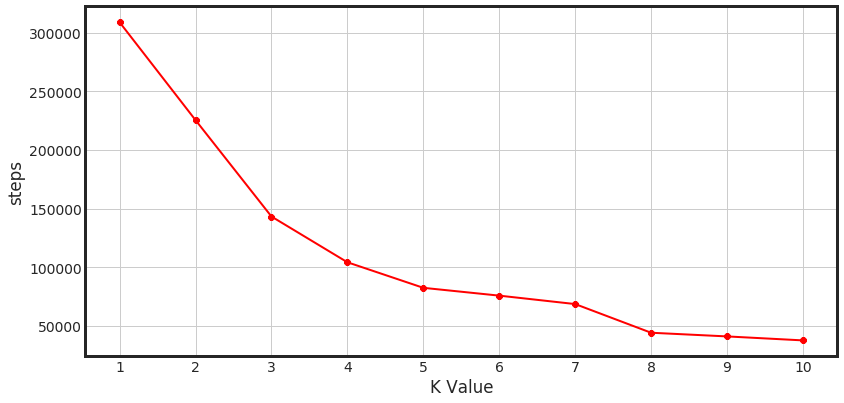

In [58]:
tester = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    tester.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),tester, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("steps")
plt.show()

#selection process for the KMeans clustering group.

In [59]:
df.head(3)

,Gender,Age,Income,Spending
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6


In [60]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

km = KMeans(n_clusters=5)
clusters = km.fit_predict(df)
df["label"] = clusters

In [61]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

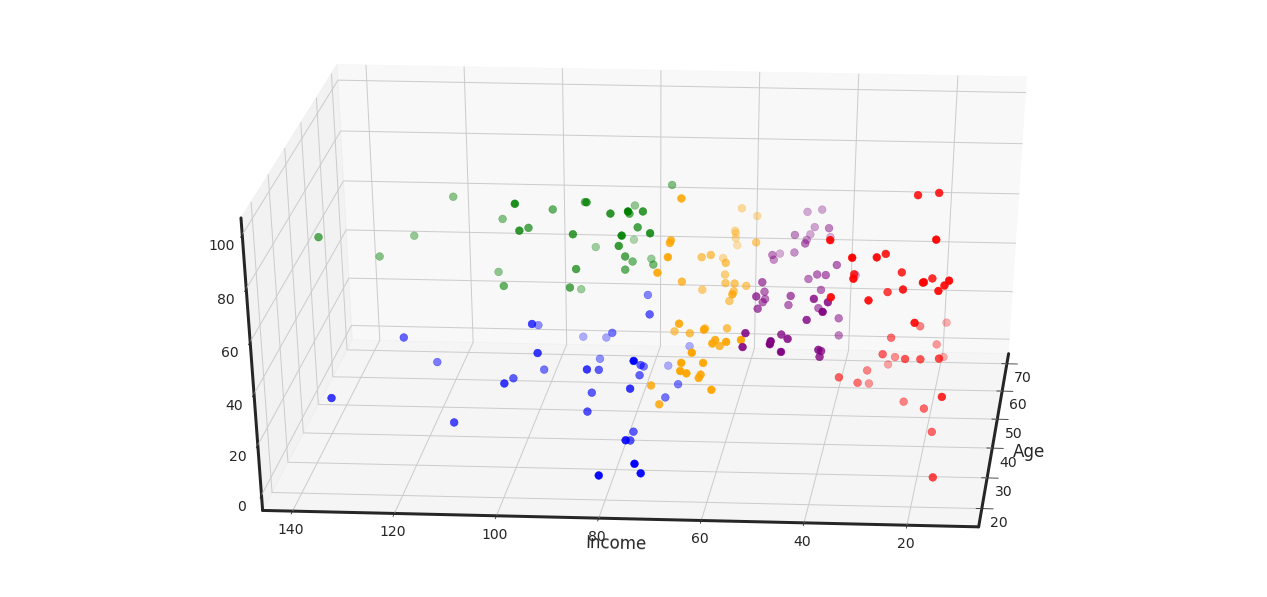

In [36]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Income"][df.label == 0], df["Spending"][df.label == 0], c='blue', s=60) # Senior Employee
ax.scatter(df.Age[df.label == 1], df["Income"][df.label == 1], df["Spending"][df.label == 1], c='red', s=60) # Employee
ax.scatter(df.Age[df.label == 2], df["Income"][df.label == 2], df["Spending"][df.label == 2], c='green', s=60) # Students
ax.scatter(df.Age[df.label == 3], df["Income"][df.label == 3], df["Spending"][df.label == 3], c='orange', s=60) # Retired
ax.scatter(df.Age[df.label == 4], df["Income"][df.label == 4], df["Spending"][df.label == 4], c='purple', s=60) # Investors
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Income")# ax.set_zlabel('Spending')
plt.show()


# Creating a clustering based on five group of audience.
# where as per model output is followed group.
#"0 - Working class", "1-Students" , "2 - Wealthy class" , "3- Economical class" , "4- Frequent buyer"


In [66]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import pickle

# km = KMeans(n_clusters=5)
# clusters = km.fit_predict(df.iloc[:,1:])
# df["label"] = clusters

df = df.replace({'label':{ 0:"Working class", 1:"Students" , 2: "wealthy class",3:"Economical class", 4:"Frequent buyer"}})

# import joblib
# joblib.dump(km, 'model.joblib')





In [68]:
df.head(5)
# Final Clustering group based on Gender, Age , Income and Spending 

,Gender,Age,Income,Spending,label
0,0,19,15,39,Students
1,0,21,15,81,Students
2,1,20,16,6,Economical class
3,1,23,16,77,Students
4,1,31,17,40,Economical class


In [69]:


with open('model.pkl', 'wb') as model_file:
  pickle.dump(km, model_file)

In [75]:
df.to_csv('results1.csv', index = False)
!gsutil cp 'results1.csv' 'gs://sales_data_123'

Copying file://results1.csv [Content-Type=text/csv]...
AccessDeniedException: 403 92726491891-compute@developer.gserviceaccount.com does not have storage.objects.create access to sales_data_123/results1.csv.


In [76]:
!gsutil cp ./model.pkl gs://sales_data_123/model.pkl

AccessDeniedException: 403 92726491891-compute@developer.gserviceaccount.com does not have storage.objects.list access to sales_data_123.
